# Predicting Stock Prices with Linear Regression

To answer the question if we can accurately predict stock prices over time, I am going to use Stock Price history data from the Quadl API, and apply a regression analysis method. 

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [2]:
# import API key from file
quandl.ApiConfig.api_key = "KjzSUZswdhzKyLNS-mhE"


In [3]:
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()
# Load data from Quandl
data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
data.to_csv('SAP.csv')
data.head()


,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,None,None,NaN
2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,None,None,NaN
2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,None,None,NaN
2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,None,None,NaN
2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,None,None,NaN


In [4]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2971 entries, 2009-03-09 to 2020-11-06
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2631 non-null   float64
 1   High                   2964 non-null   float64
 2   Low                    2964 non-null   float64
 3   Close                  2971 non-null   float64
 4   Change                 11 non-null     float64
 5   Traded Volume          2925 non-null   float64
 6   Turnover               2918 non-null   float64
 7   Last Price of the Day  0 non-null      object 
 8   Daily Traded Units     0 non-null      object 
 9   Daily Turnover         7 non-null      float64
dtypes: float64(8), object(2)
memory usage: 255.3+ KB


In [5]:
# Get descriptive statistics summary of data set
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Daily Turnover
count,2631.000000,2964.000000,2964.000000,2971.000000,11.000000,2.925000e+03,2.918000e+03,7.0
mean,65.770490,69.577406,68.334356,68.902449,-0.070000,3.176952e+06,1.964832e+08,0.0
std,27.967987,28.178552,27.662814,27.964527,0.709761,2.017829e+06,1.199656e+08,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,7.936064e+04,0.0
25%,43.415000,45.657500,44.647500,44.680000,-0.500000,2.034157e+06,1.320944e+08,0.0
50%,58.660000,61.365000,60.500000,60.930000,-0.290000,2.717364e+06,1.713689e+08,0.0
75%,81.395000,91.895000,90.372500,91.100000,0.085000,3.772263e+06,2.266246e+08,0.0
max,142.800000,143.240000,141.080000,142.340000,1.250000,3.645671e+07,1.376505e+09,0.0


In [6]:
# Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

## Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.

- 'Close' column has numerical data type
- The 'Date' is the index column and contains datetime values

In [7]:
# Create a new DataFrame with only closing price and date
df=pd.DataFrame(data, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df=df.reset_index()

In [8]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [9]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971 entries, 0 to 2970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2971 non-null   datetime64[ns]
 1   Close   2971 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.5 KB


In [10]:
# Check for missing values in the columns
df.isna().values.any()

False

## Explore the Data
When we take a look at the price movement over time by simply plotting the Closing price vs Time, we can already see, that the price continiously increases over time and we can also estimate that trend could be linear. 


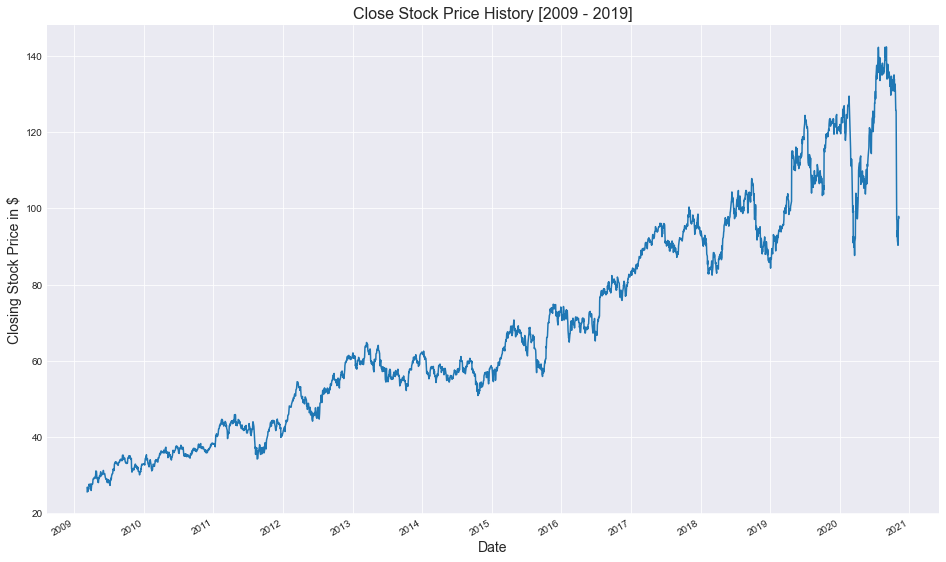

In [11]:
# Import matplotlib package for data plots
import matplotlib.dates as mdates

years=mdates.YearLocator() # Get every year
yearsFmt=mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax=plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)
# Rotate and align the x labels 
fig.autofmt_xdate()
# Show plot
plt.show()

## Linear Regression

**Our data contains only one independent variable (X)</strong> which represents the <em>date</em> and the <strong>dependent variable (Y)</strong> we are trying to predict is the <em>Stock Price</em>. To fit a line to the data points, which then represents an estimated relationship between X and Y, we can use a Simple Linear Regression.**

The best fit line can be described with

Y = Beta_0 + Beta_1*X,

where
- Y is the predicted value of the dependent variable 
- B_0 is the y-intercept
- B_1 is the slope
- X is the value of the independent variable 

The goal is to find such coefficients Beta_0 and Beta_1 that the **Sum of Squared Error**, which represents the difference between each point in the dataset with its corresponding predicted value outputted by the model, is minimal. 

## Training a Linear Regression Model
### Train Test Split


In [12]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [13]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

## Create and Train the Model


In [14]:
# Import package for Linear Model
from sklearn.linear_model import LinearRegression

In [15]:
# Reshape index column to 2D array for .fit() method
X_train=np.array(train.index).reshape(-1, 1)
y_train=train['Close']

In [16]:
# Create LinearRegression Object
model=LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation


In [25]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.03130429125923794
Intercept:  22.343255304250874


<ipython-input-25-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


Interpreting the coefficients:

- The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0276 dollars
- The **intercept** coefficient is the price at which the **closing price** measurement started, the stock price value at date zero


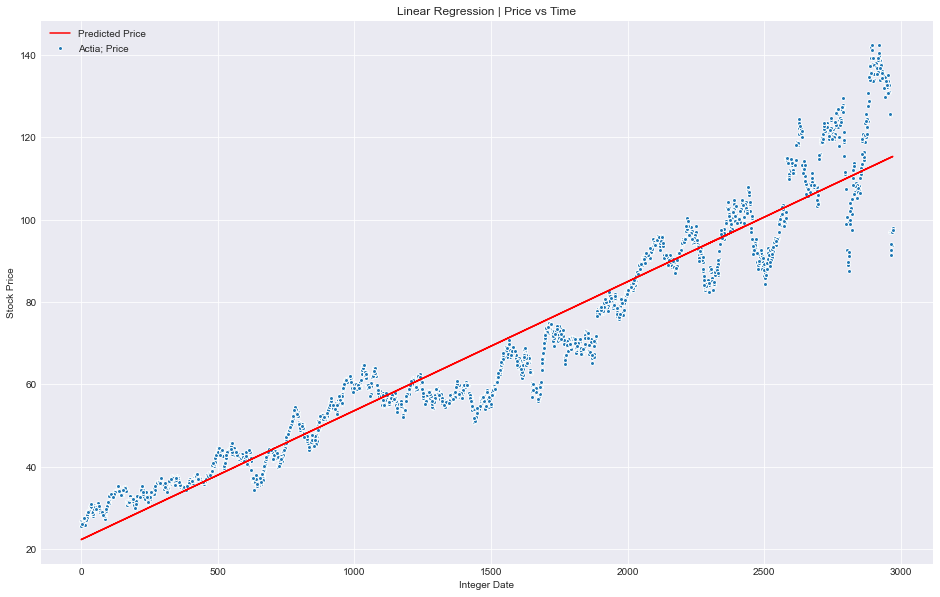

In [26]:
# Train set graph
plt.figure(1,figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actia; Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Prediction from our Model


In [27]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [28]:
# Generate array with predicted values
y_pred = model.predict(X_test)

## Regression Evaluation

Let's have a look at how the predicted values compare with the actual value on random sample from out data set. 


In [29]:
# Get number of rows in data set for random sample
df.shape

(2971, 2)

In [30]:
# Generate 25 random numbers from it
randints=np.random.randint(2971, size=25)

# Select row numbers == random numbers
df_sample=df[df.index.isin(randints)]

In [31]:
df_sample.head()

,Date,Close
271,2010-03-23,35.22
376,2010-08-19,35.13
397,2010-09-17,36.96
405,2010-09-29,36.48
417,2010-10-15,38.16
